In [2]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [1]:
input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
lr = 0.001
batch_size = 64
num_epochs = 2

In [31]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,num_classes):
        super(RNN,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.rnn = nn.RNN(input_size,hidden_size,num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size*sequence_length,num_classes)
    
    def forward(self,x):# 64,28,28
        h0 = t.zeros(self.num_layers,x.size(0),self.hidden_size) # 2,64,256

        out,_ = self.rnn(x,h0)
        out = out.reshape(out.shape[0],-1)
        out = self.fc(out)
        return out

In [32]:
train = datasets.MNIST(root='',train=True,download=True,transform=transforms.ToTensor())
test  = datasets.MNIST(root='',train=False,download=True,transform=transforms.ToTensor())
train_loader  = DataLoader(train,batch_size=64,shuffle=True)
test_loader  = DataLoader(test,batch_size=64,shuffle=True)

In [33]:
model = RNN(28,256,2,10)
model(t.randn(64,28,28)).shape

torch.Size([64, 10])

In [34]:
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(),lr=0.001)

In [35]:
losses = []

In [39]:
for epoch in range(1):
    for batch_idx,(data,targets) in enumerate(train_loader):
        # data = data.reshape(data.shape[0],-1)
        # print(data.shape,targets.shape)
        # print(data.shape
        scores = model(data.squeeze(1))
        # print(scores.shape)
        loss = criterion(scores,targets)
        # print(loss)
        losses.append(loss.item())
        
        model.zero_grad()
        loss.backward()

        optimiser.step()
        # break

0.4095575213432312


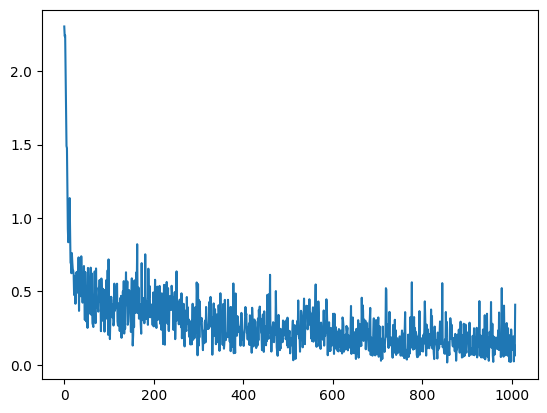

In [40]:
print(losses[-1])
plt.plot(losses)

In [41]:
def check_accuracy(loader,model):
    num_currect = 0
    num_samples = 0
    model.eval()

    with t.no_grad():
        for x,y in loader:
            # x = x.reshape(x.shape[0],-1)
            x = x.squeeze(1)
            scores = model(x) # (64,10)
            _,preds = scores.max(1)
            num_currect += (preds==y).sum()
            num_samples += len(y)

        print(f'{num_currect} / {num_samples} with accuracy {(num_currect/num_samples)}')

print('train accuracy')
check_accuracy(train_loader,model)
print('train accuracy')
check_accuracy(test_loader,model)

train accuracy
57729 / 60000 with accuracy 0.962149977684021
train accuracy
9612 / 10000 with accuracy 0.9611999988555908
